In [1]:
from google.colab import drive
drive.mount('/content/drive')

!ln -s "/content/drive/MyDrive/Group_11/" link

import pandas as pd
import os

Mounted at /content/drive


In [2]:
# Extracting testset

%cd /content
!unrar x link/testset/test_crop.part1.rar
!mv test_crop4 test_crop

Output streaming troncato alle ultime 5000 righe.
Extracting  test_crop4/n009114/0227_01.jpg                                96%  OK 
Extracting  test_crop4/n009114/0228_01.jpg                                96%  OK 
Extracting  test_crop4/n009114/0237_01.jpg                                96%  OK 
Extracting  test_crop4/n009114/0238_02.jpg                                96%  OK 
Extracting  test_crop4/n009114/0259_04.jpg                                96%  OK 
Extracting  test_crop4/n009114/0261_01.jpg                                96%  OK 
Extracting  test_crop4/n009114/0264_02.jpg                                96%  OK 
Extracting  test_crop4/n009114/0269_01.jpg                                96%  OK 
Extracting  test_crop4/n009114/0269_02.jpg                                96%  OK 
Extracting  test_crop4/n009114/0269_03.jpg                                96%  OK 
Extracting  test_crop4/n009114

In [3]:
!pip install mtcnn
!pip install git+https://github.com/rcmalli/keras-vggface.git
!pip install keras_vggface
!pip install keras_applications

     |████████████████████████████████| 2.3MB 11.4MB/s 
  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-hv4nxd_b
  Running command git clone -q https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-hv4nxd_b
  Created wheel for keras-vggface: filename=keras_vggface-0.6-cp36-none-any.whl size=8310 sha256=537bfa2d08925038b80ee3089c1e590b7e9136b63dbc27e3701f44349a6ca3fe
  Stored in directory: /tmp/pip-ephem-wheel-cache-vtg_pnvm/wheels/36/07/46/06c25ce8e9cd396dabe151ea1d8a2bc28dafcb11321c1f3a6d
Successfully built keras-vggface
     |████████████████████████████████| 51kB 5.7MB/s 


La fase di preprocessing è stata suddivisa in due step:


1.   Face Detection & Face Alignment

  In questa fase viene identificato il volto all'interno dell'immagine e   successivamente l'immagine viene ruotata se tale volto è inclinato rispetto l'osservatore. 
Tale operazione viene eseguita dalla funzione sottostante *preprocess_image*,
dato che i tempi di preprocessing delle immagini, mediante l'uso di tale funzione, sono estremamente lunghi, viene già fornito un testset (chiamata *test_crop*), generato in locale, di immagini preprocessate mediante tale tecnica.

2.   VggFace Preprocessing

  I pixel delle rispettive immagini vengono elaborati mediante le funzioni messe a disposizione da *keras_vggface*



In [ ]:
from imutils.face_utils import FaceAligner
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import imutils
import dlib
from imutils.face_utils import rect_to_bb
from keras_vggface import utils
from mtcnn import MTCNN

%cd /content/

# initialize dlib's face detector (HOG-based) and then create
# the facial landmark predictor and the face aligner

detector = MTCNN()
predictor = dlib.shape_predictor('link/shape_predictor_68_face_landmarks.dat')
fa = FaceAligner(predictor, desiredFaceWidth=224)


def preprocess_image(image):
  # load the input image, resize it, and convert it to grayscale
  
  image = image.astype(np.uint8)
  gray = cv.cvtColor(image, cv.COLOR_RGB2GRAY)

  rects = []
  for faces in detector.detect_faces(image):
    box = faces["box"]
    rects.append(dlib.rectangle(box[0], box[1], box[0]+box[2], box[1]+box[3]))
  max = 0

  # loop over the face detections
  for rect in rects:
    # extract the ROI of the *original* face, then align the face
    # using facial landmarks
    (x, y, w, h) = rect_to_bb(rect)
    area = w*h
    if area > max:
      max = area
      (x_m, y_m, w_m, h_m) = (x, y, w, h)
      rect_m = rect

  if max!=0:
    # face revealed, now it is aligned
    faceAligned = fa.align(image, gray, rect_m)
    return faceAligned
  
  return image

/content


In [ ]:
from keras_vggface import utils
from  keras.models import load_model
import cv2 as cv

#Loading model

model = load_model("/content/link/model.h5")
def model_predict(img):

  if img.shape != (224, 224, 3):
    img = cv.resize(img, (224, 224))

  img=utils.preprocess_input(img.astype('float64'), version=2)
  img = img[np.newaxis, :]
  classes = model.predict(img)
  age = int(np.argmax(classes))
  return age

/content/test_crop
n007664/0123_02.jpg - Age estimated:  19


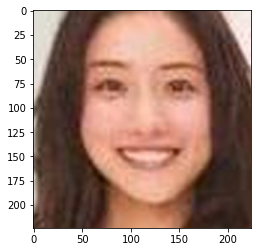

n007664/0122_01.jpg - Age estimated:  19


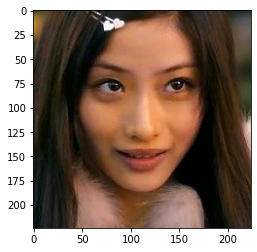

n007664/0089_01.jpg - Age estimated:  15


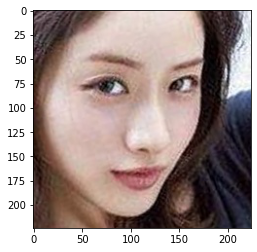

n007664/0049_01.jpg - Age estimated:  15


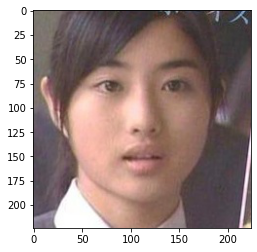

n007664/0130_01.jpg - Age estimated:  15


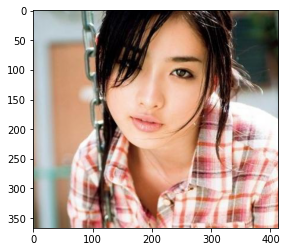

n007664/0818_01.jpg - Age estimated:  21


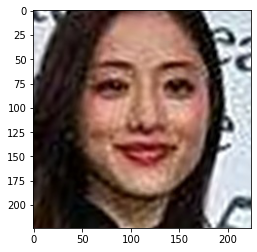

n007664/0153_01.jpg - Age estimated:  15


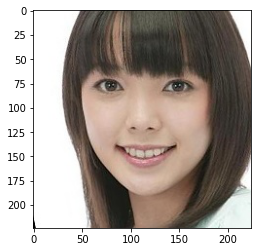

n007664/0082_03.jpg - Age estimated:  15


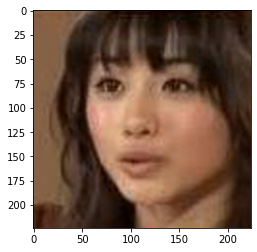

n007664/0041_01.jpg - Age estimated:  15


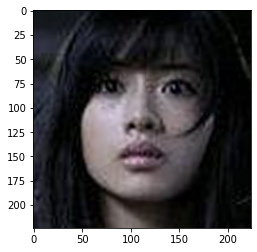

n007664/0054_02.jpg - Age estimated:  21


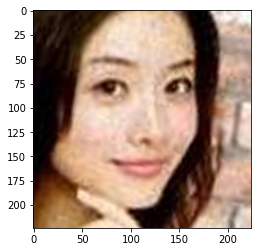

n007664/0029_01.jpg - Age estimated:  19


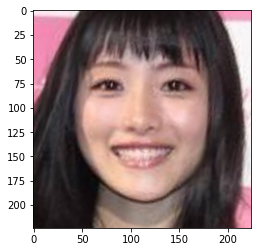

n007664/0214_01.jpg - Age estimated:  19


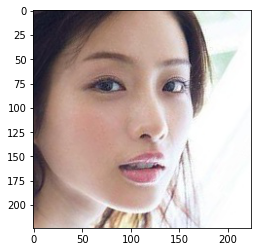

n007664/0072_01.jpg - Age estimated:  19


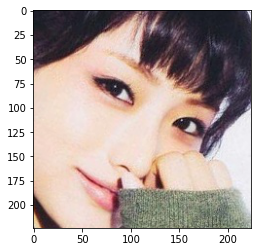

n007664/0176_01.jpg - Age estimated:  21


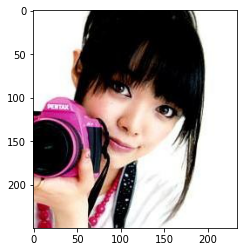

n007664/0030_01.jpg - Age estimated:  15


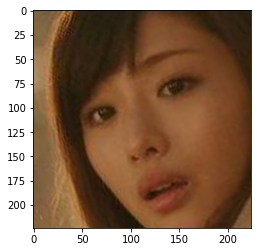

n007664/0040_01.jpg - Age estimated:  15


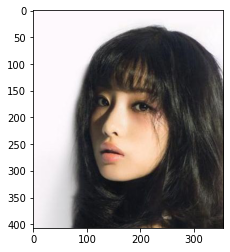

KeyboardInterrupt: ignored

In [ ]:
from keras import preprocessing
import numpy as np
import matplotlib.pyplot as plt

%cd /content/test_crop/

#Set plot to True if you want see the image
def run_test(plot=False):

  FILE_INPUT = "GROUP_11.csv"

  PATH = "/content/link/" + FILE_INPUT

  df = pd.read_csv(PATH, dtype="string")

  for indx, row in df.iterrows():

    img = preprocessing.image.load_img(row["filepath"])
    img = preprocessing.image.img_to_array(img)

    path = row["filepath"]

    assert(img is not None)

    age = str(model_predict(img))
    print(path, "-", "Age estimated: ", age)

    if plot:
      plt.imshow(img.astype(np.uint8))
      plt.show()

#Running test
run_test(plot=True)

In [ ]:
def calc_mae(X, Y):

  error = 0
  
  if X.shape[0] == 0:
    return 0

  for i in range(X):
    error += abs(int(Y[i]) - int(model_predict(Y[i])[0]))
  return error/X.shape[0] 

La funzione sottostante può essere utilizzata se si desidera stimare l'età di un soggeto non appartenente al testset da noi fornito.
Viene effettuata la Face Detection & Face Alignment, VggFace preprocessing ed infine l'immagine viene data in input alla rete per la stima dell'età.
Viene inoltre fornito il testset originale contente le immagini non preprocessate, denominato: *vggface2.tar.gz*

In [ ]:
%cd /content

# Extracting original dataset
!tar xvfz link/testset/vggface2.tar.gz 
!mv /content/test/ /content/original_testset

Image before pre-processing


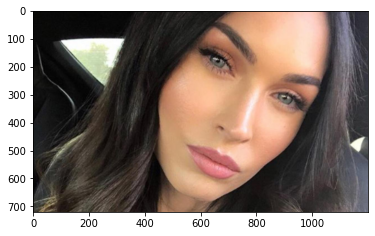

Image after Face Detection & Face Alignment


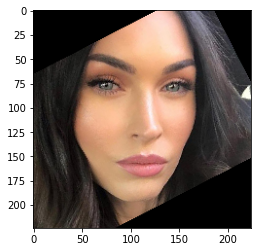

Age estimated: 19


In [ ]:
import matplotlib.pyplot as plt
from keras import preprocessing
import numpy as np

def predict_one_image(image_path):

  img = preprocessing.image.load_img(image_path)
  img = preprocessing.image.img_to_array(img)

  print("Image before preprocessing")
  plt.imshow(img.astype(np.uint8))
  plt.show()

  img = preprocess_image(img)

  print("Image after Face Detection & Face Alignment")
  plt.imshow(img)
  plt.show()

  age = model_predict(img)
  print("Age estimated:", age)

predict_one_image("/content/link/testset/megan.jpg")